In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from xgboost import XGBRegressor

from forecaster import Forecaster

In [2]:
train = pd.read_csv('train.csv', parse_dates=['date']).sort_values(by = "date")
test = pd.read_csv('test.csv', parse_dates=['date']).sort_values(by = "date")
ids = test['id']

df = pd.concat([train, test])

In [3]:
df['Covid'] = (df['date'].dt.year == 2020).astype(int)

<Axes: xlabel='date'>

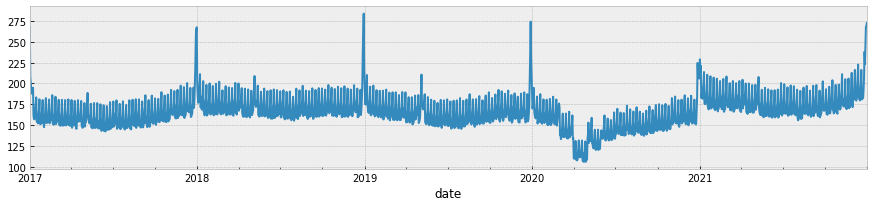

In [4]:
average_sales = df[:len(train)].groupby('date')['num_sold'].mean()
average_sales.plot(figsize = (15, 3))

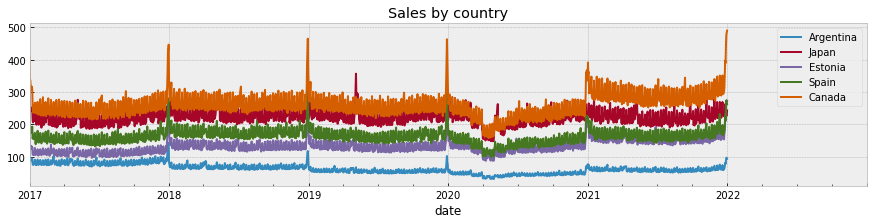

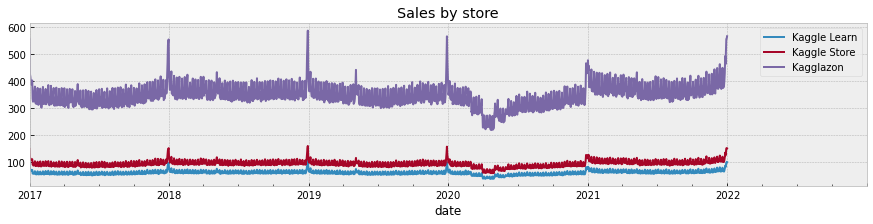

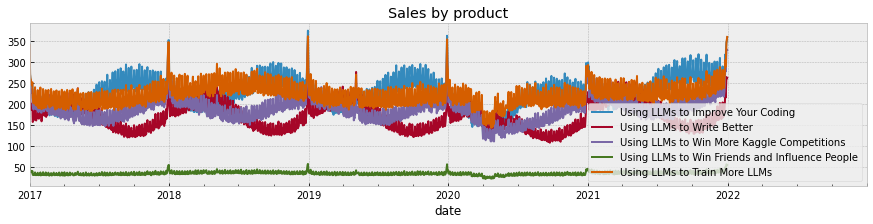

In [5]:
for country in df['country'].unique():
    ax = df[df['country'] == country][:len(train)].groupby('date')['num_sold'].mean().plot(figsize=(15, 3), label=country)
ax.legend()
ax.set_title("Sales by country")
plt.show()

for country in df['store'].unique():
    ax = df[df['store'] == country][:len(train)].groupby('date')['num_sold'].mean().plot(figsize=(15, 3), label=country)
ax.legend()
ax.set_title("Sales by store")
plt.show()

for country in df['product'].unique():
    ax = df[df['product'] == country][:len(train)].groupby('date')['num_sold'].mean().plot(figsize=(15, 3), label=country)
ax.legend()
ax.set_title("Sales by product")
plt.show()

In [6]:
model = Forecaster(
    df,
    x = 'date',
    y = 'num_sold',
    group_features = ['country', 'store', 'product'],
    keep_id = 'id'
)

  0%|          | 0/75 [00:00<?, ?it/s]

Training score
Argentina Kagglazon    Using LLMs to Improve Your Coding                     0.003468
                       Using LLMs to Train More LLMs                         0.001818
                       Using LLMs to Win Friends and Influence People        0.003561
                       Using LLMs to Win More Kaggle Competitions            0.003029
                       Using LLMs to Write Better                            0.004180
...                                                                               ...
Spain     Kaggle Store Using LLMs to Improve Your Coding                     0.002117
                       Using LLMs to Train More LLMs                         0.003960
                       Using LLMs to Win Friends and Influence People        0.005049
                       Using LLMs to Win More Kaggle Competitions            0.001750
                       Using LLMs to Write Better                            0.004164

[75 rows x 1 columns]

,Training score
AVERAGE,0.003533


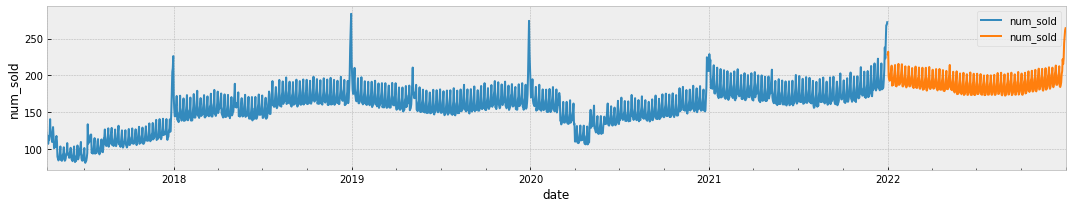

In [7]:
pred, score = model.predict(XGBRegressor, by = ['country', 'store', 'product'], seasonality = True, lag = True, plot = True)

In [9]:
pred['id'] = pred['id'].astype(int)

In [13]:
pred.sort_values(by = 'id').to_csv('submissionAA.csv', index = False)